In [2]:
 
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.special import hankel1,hankel2,jv
from scipy.fftpack import fft, fftfreq

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family'] = 'sans-serif'

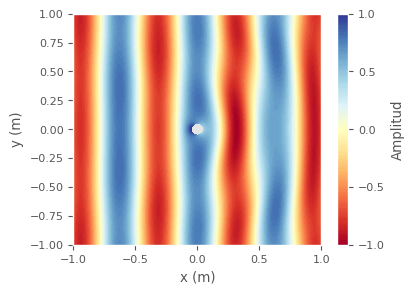

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, hankel2

# Parámetros del problema ajustados
U0 = 1.0     # Amplitud de la onda incidente
a = 0.05      # Radio del agujero cilíndrico
c = 1.0      # Velocidad  (m/s)
omega = 10.0 # Frecuencia angular (rad/s)
k = omega / c # Número de onda

# Coordenadas en el espacio (r, theta)
r = np.linspace(a, 2.0, 200)  # Distancia radial, evitando singularidad en r=0
theta = np.linspace(0, 2 * np.pi, 200)  # Ángulo theta
R, Theta = np.meshgrid(r, theta)  # Malla de coordenadas

# Coordenadas cartesianas para el campo incidente (onda plana en dirección x)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Número de modos a sumar
n_max = 5

# Coeficiente A0 (campo dispersado)
A0 = -U0 * jv(1, k * a) / hankel2(1, k * a)

# Campo dispersado Us (modo n=0)
Us = A0 * hankel2(0, k * R)

# Sumar los modos n>0 para el campo dispersado
for n in range(1, n_max + 1):
    An = (-2) * ((-1)**n) * U0 * (jv(n+1, k * a) - jv(n-1, k * a)) / \
         (hankel2(n+1, k * a) - hankel2(n-1, k * a))
    
    # Sumar la contribución de cada modo al campo dispersado
    Us += An * hankel2(n, k * R) * np.cos(n * Theta)

# Campo incidente (onda plana incidente)
u_inc = U0 * np.exp(1j * (- k * X))  # ui = U0 * exp(i k x)

u_s = Us * np.exp(1j * (- k * X))  # Campo dispersado en el tiempo   

# Sumar el campo incidente y dispersado para obtener el campo total
u_total = np.real(u_inc + u_s) 

# Normalizar u_total para que quede entre -1 y 1
u_total_norm = 2 * (u_total - np.min(u_total)) / (np.max(u_total) - np.min(u_total)) - 1

# Graficar el campo total normalizado
plt.figure()
contour = plt.contourf(R * np.cos(Theta), R * np.sin(Theta), u_total_norm, 100, cmap='RdYlBu', vmin=-1, vmax=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
cbar = plt.colorbar(contour, label="Amplitud", extend='both')
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
plt.grid(False)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.tight_layout()
    
plt.show()